In [1]:
pwd

'C:\\Users\\manga\\anaconda3'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [3]:
df= pd.read_csv('heart.csv')
df.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [27]:
corr=df.corr()

<AxesSubplot:>

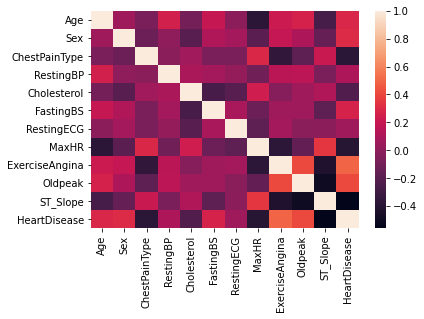

In [29]:
sns.heatmap(corr)

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [10]:
from  sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])


In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
X=df.iloc[ : , :11]
y=df.iloc[ : , -1:]

In [13]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [14]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [15]:

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info

c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.06611916, 0.06579196, 0.167892  , 0.01519475, 0.07735242,
       0.05773414, 0.        , 0.09603388, 0.12250604, 0.09949659,
       0.20427135])

In [25]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)


ST_Slope          0.204271
ChestPainType     0.167892
ExerciseAngina    0.122506
Oldpeak           0.099497
MaxHR             0.096034
Cholesterol       0.077352
Age               0.066119
Sex               0.065792
FastingBS         0.057734
RestingBP         0.015195
RestingECG        0.000000
dtype: float64

In [26]:
from sklearn.feature_selection import SelectKBest

In [18]:
sel_five_cols = SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X,y)
X.columns[sel_five_cols.get_support()]

c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'], dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['HeartDisease','Cholesterol','Sex','Age','FastingBS','RestingBP','RestingECG'],axis=1),df['HeartDisease'],test_size=0.2,random_state=0)

In [20]:
X_train.head()

,ChestPainType,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,0,157,1,2.0,1
356,0,113,1,1.5,1
738,2,151,0,0.8,2
85,0,94,1,1.0,1
427,0,117,1,1.0,1


In [21]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model.fit(X_train,y_train)
PREDICTIONS=model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,PREDICTIONS))



              precision    recall  f1-score   support

           0       0.71      0.71      0.71        77
           1       0.79      0.79      0.79       107

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



In [23]:
import pickle
pickle_out=open("heart1.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [24]:
model.predict([[0,157,1,2.0,1]])

array([1], dtype=int64)